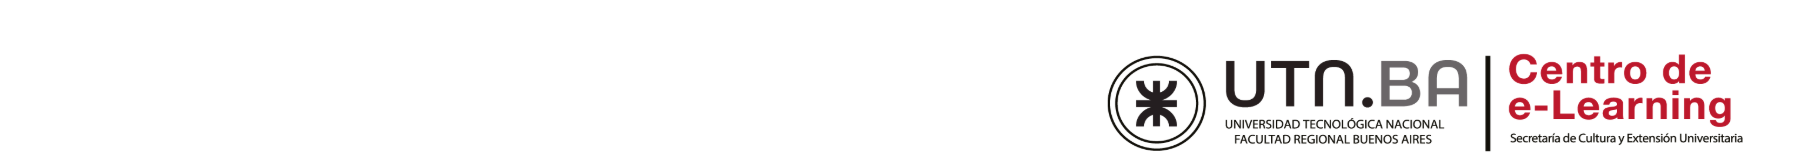

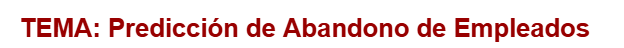

----------------------------------------------------------------------------

Dataset elegido : https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

### **1. Configuración Inicial e Importación de Librerías**

En esta sección, importaremos todas las librerías necesarias para el proyecto. Es una buena práctica tener todas las importaciones en la primera celda.

In [ ]:
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Para modelado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Para evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

# Configuraciones adicionales para una mejor visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
# Ignorar warnings para una salida más limpia (opcional)
import warnings
warnings.filterwarnings('ignore')

### **2. Carga del Dataset**
Ahora, vamos a cargar el archivo HR-Employee-Attrition.csv en un DataFrame de Pandas.

In [ ]:
df= pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

**Creamos una copia del DF para trabajar.**


In [ ]:
df_copia = df.copy()

### **3. Análisis Exploratorio de Datos (EDA)**
Este es un paso crucial para entender los datos. Empezaremos con unos comandos básicos para tener una primera impresión.

**Inspección de los datos**
* Visualizar las primeras 5 filas:

In [ ]:
df_copia.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* Verificamos la información del DataFrame:

In [ ]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* Descripción estadística de las variables numéricas:

In [ ]:
df_copia.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### **Identificación de Valores Faltantes**

Para asegurar la integridad y completitud de nuestro dataset, utilizamos la función df.isnull().sum() para identificar y cuantificar la presencia de valores nulos NaN en cada una de las columnas. Este paso es fundamental para decidir las estrategias de imputación o eliminación necesarias antes de proceder con el modelado.

In [ ]:
print("Conteo de valores faltantes en df:")
print(df.isnull().sum())

Conteo de valores faltantes en df:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
Years


* Ninguna limpieza compleja es necesaria en este momento. Los datos están listos para el preprocesamiento.
* La principal tarea pendiente es la codificación de variables categóricas a un formato numérico para que los modelos de machine learning puedan procesarlas.

**4. Preguntas de negocio para el Análisis Visual**






¿Cuál es la tasa de abandono? (Attrition Rate).

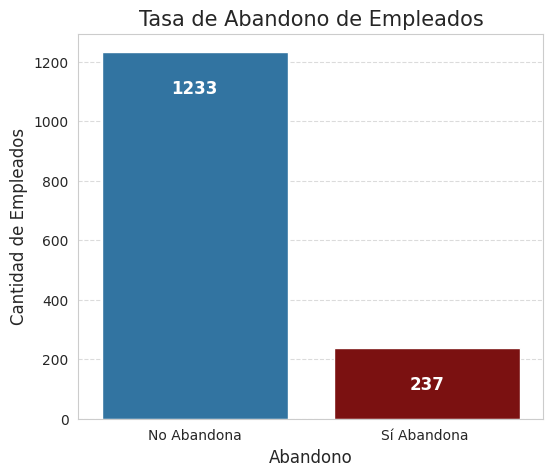

In [ ]:
# Contar la cantidad de empleados que se quedaron y los que se fueron
conteo_abandono = df_copia['Attrition'].value_counts()

orden_barras = ['No', 'Yes']

# Crear el gráfico de barras con colores personalizados para cada categoría
plt.figure(figsize=(6, 5))
grafico = sns.countplot(
    x='Attrition',
    data=df_copia,
    order=orden_barras,
    palette={'No': '#1f77b4', 'Yes': '#8c0000'}  # Azul para No, Bordo para Yes
)

# Añadimos etiquetas con el números total en cada barra
for p in grafico.patches:
   height = int(p.get_height())
   grafico.annotate(f'{height}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center',
                   va='center',
                   xytext=(0, -26),
                   textcoords='offset points',
                   fontsize=12,
                   color='white',
                   fontweight='bold')

# Configurarmoa el título y las etiquetas
plt.title('Tasa de Abandono de Empleados', fontsize=15)
plt.xlabel('Abandono', fontsize=12)
plt.ylabel('Cantidad de Empleados', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Abandona', 'Sí Abandona '],fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* ¿Cómo se relaciona el salario con el abandono?

El salario es un factor motivacional clave.Es por esto que se utilizaremos un boxplot para comparar la distribución del salario mensual entre los que empleados que abandonaron y los que se quedaron en la empresa.

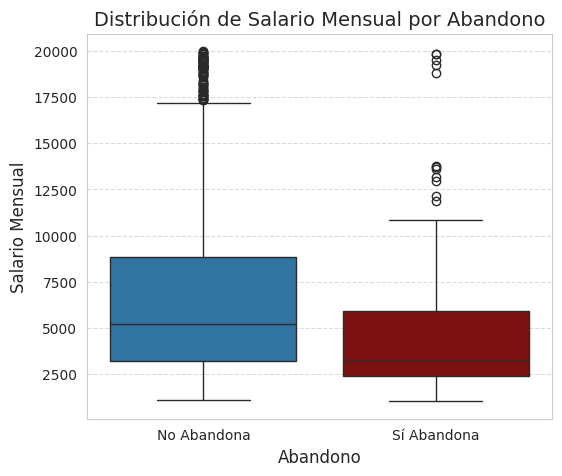

In [ ]:
# Gráfico de caja (boxplot) para comparar MonthlyIncome vs Attrition
plt.figure(figsize=(6, 5))

# Definimos el orden explícito para las categorías del eje x
orden_categorias = ['No', 'Yes']

sns.boxplot(
    x='Attrition',
    y='MonthlyIncome',
    data=df_copia,
    order=orden_categorias,
    palette={'No': '#1f77b4', 'Yes': '#8c0000'}
)

# Configurar el título y las etiquetas para una mejor lectura
plt.title('Distribución de Salario Mensual por Abandono', fontsize=14)
plt.xlabel('Abandono', fontsize=12)
plt.ylabel('Salario Mensual', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Abandona', 'Sí Abandona'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El análisis de la distribución de salario mensual revela una clara diferencia entre los empleados que se quedaron y los que se fueron. La mediana salarial de los empleados que abandonaron es notablemente más baja que la de aquellos que permanecieron en la empresa.

Este hallazgo sugiere que el salario es un **factor de riesgo** importante para el abandono de empleados. Aunque se observan outliers (empleados con salarios muy altos) en ambos grupos, la mayor concentración de los datos en el rango inferior para los que abandonan indica que los empleados con menores ingresos son más propensos a dejar la empresa.

La empresa podría considerar la implementación de estrategias de retención enfocadas en la compensación salarial para los grupos con ingresos más bajos.



* ¿Hay alguna relación entre la edad y el abandono?

La edad puede influir en la decisión de un empleado de cambiar de trabajo. Un histograma mostrara si hay un grupo de edad más propenso al abandono.

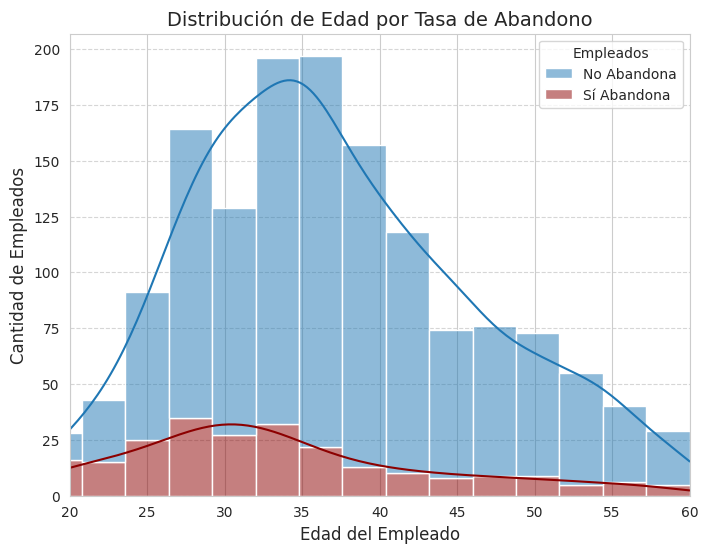

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    x='Age',
    hue='Attrition',
    data=df_copia,
    bins=15,
    multiple='stack',
    kde=True,
    palette={'No': '#1f77b4', 'Yes': '#8c0000'},
    hue_order=['No', 'Yes']
)

# Definir las marcas del eje X cada 5 años
marcas_eje_x = np.arange(20, 65, 5)
plt.xticks(marcas_eje_x)

# Ajustar el rango del eje X
plt.xlim(20, 60)

# Configurarmos el título y las etiquetas
plt.title('Distribución de Edad por Tasa de Abandono', fontsize=14)
plt.xlabel('Edad del Empleado', fontsize=12)
plt.ylabel('Cantidad de Empleados', fontsize=12)

# leyenda
leyenda = plt.gca().get_legend()
if leyenda:
    leyenda.get_texts()[0].set_text('No Abandona')
    leyenda.get_texts()[1].set_text('Sí Abandona')
    leyenda.set_title('Empleados')

plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

El análisis del histograma combinado con la curva de densidad muestra una clara relación entre la edad del empleado y la tasa de abandono. Se observa que la mayor concentración de empleados que abandonan la empresa (**Sí Abandona**) se encuentra en el rango de edad de los veintes y principios de los treintas.

En contraste, la población de empleados que no abandona (**No Abandona**) es significativamente mayor y con una distribución de edad más amplia, alcanzando su pico de concentración en el rango de los 30 a 40 años. Este patrón sugiere que los **empleados más jóvenes son los más propensos a la rotación**, lo que convierte a este grupo demográfico en un objetivo clave para las estrategias de retención del departamento de Recursos Humanos y de la empresa.

* ¿Como la satisfacción influye más en el abandono?


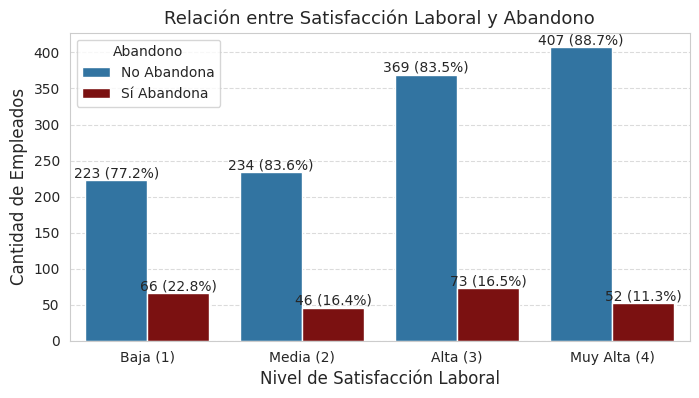

In [ ]:
plt.figure(figsize=(8, 4))

# Crear el gráfico de barras
ax = sns.countplot(
    x='JobSatisfaction',
    hue='Attrition',
    data=df_copia,
    palette={'No': '#1f77b4', 'Yes': '#8c0000'}
)

# Calcular el total de empleados por cada nivel de satisfacción
totales_satisfaccion = df_copia.groupby(['JobSatisfaction'])['Attrition'].count()

# Añadir las etiquetas con el conteo y el porcentaje
for p in ax.patches:
    # La posicion x de la barra nos ayuda a identificar la categoria
    x_pos = p.get_x()

    # La posicion y de la barra nos ayuda a identificar el conteo
    conteo = p.get_height()

    # Obtener la categoria de satisfaccion (1, 2, 3, o 4)
    nivel_satisfaccion = int(x_pos + 0.5) + 1

    # Obtener el total de empleados para ese nivel
    total_de_categoria = totales_satisfaccion[nivel_satisfaccion]

    # Si el conteo es 0, no mostramos la etiqueta
    if conteo == 0:
        continue

    # Calcular el porcentaje
    porcentaje = 100 * conteo / total_de_categoria

    # Formato de la etiqueta: "58 (50.0%)"
    etiqueta = f'{int(conteo)} ({porcentaje:.1f}%)'

    # Posicionar la etiqueta
    ax.annotate(etiqueta,
                (x_pos + p.get_width() /2.,conteo),
                ha='center',
                va='center',
                xytext=(0,5),
                textcoords='offset points')


# Configurar el título y las etiquetas
plt.title('Relación entre Satisfacción Laboral y Abandono', fontsize=13)
plt.xlabel('Nivel de Satisfacción Laboral', fontsize=12)
plt.ylabel('Cantidad de Empleados', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Baja (1)', 'Media (2)', 'Alta (3)', 'Muy Alta (4)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Corregir la leyenda
leyenda = plt.gca().get_legend()
if leyenda:
    leyenda.get_texts()[0].set_text('No Abandona')
    leyenda.get_texts()[1].set_text('Sí Abandona')
    leyenda.set_title('Abandono')

plt.show()

El análisis del gráfico de satisfacción laboral revela una relación directa entre la satisfacción del empleado y la propensión al abandono. La tasa de abandono es notablemente más alta entre los empleados con baja satisfacción (1), con un 22.8% de ellos dejando la empresa.

Una observación crítica, sin embargo, es que las categorías de satisfacción media (2) y alta (3) muestran tasas de abandono porcentualmente similares, de 16.4% y 16.5% respectivamente. Esto sugiere que la empresa no solo enfrenta un desafío con los empleados insatisfechos, sino que también tiene una oportunidad de retención perdida con aquellos que ya tienen una opinión positiva de su trabajo.

En conclusión, la satisfacción laboral es un factor crítico de retención, y el departamento de Recursos Humanos debería enfocarse no solo en abordar la insatisfacción, sino también en convertir la satisfacción media y alta en un factor de lealtad para reducir la rotación.



* ¿Como esta relacionado el abandono con los años de antiguedad?

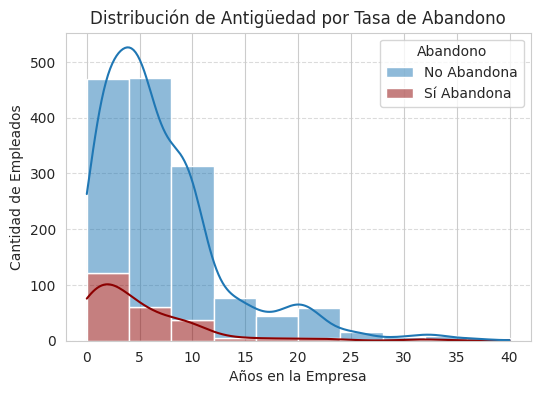

In [ ]:

plt.figure(figsize=(6, 4))

# Crear el histograma con la curva de densidad (KDE)
sns.histplot(
    x='YearsAtCompany',
    hue='Attrition',
    data=df_copia,
    bins=10,
    multiple='stack',
    kde=True,
    palette={'No': '#1f77b4', 'Yes': '#8c0000'},
    hue_order=['No', 'Yes']
)

# Configurar el título y las etiquetas
plt.title('Distribución de Antigüedad por Tasa de Abandono', fontsize=12)
plt.xlabel('Años en la Empresa', fontsize=10)
plt.ylabel('Cantidad de Empleados', fontsize=10)

# leyenda
leyenda = plt.gca().get_legend()
if leyenda:
    leyenda.get_texts()[0].set_text('No Abandona')
    leyenda.get_texts()[1].set_text('Sí Abandona')
    leyenda.set_title('Abandono')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El análisis de la antigüedad en la empresa revela una relación directa con el abandono. El pico de rotación se concentra en los primeros **1-2 años** de antigüedad, lo que confirma que el **problema de la rotación ocurre al principio**, poco después de que los empleados se unen a la empresa. Esto sugiere un punto crítico en la retención temprana. La estabilidad del empleado en la empresa se incrementa notablemente, Aunque también tiene un pico al principio, su densidad se mantiene mucho más alta a medida que los empleados ganan antigüedad. Esto indica que mientras más tiempo pasa un empleado en la empresa, mayor es su probabilidad de quedarse.





**GRAFICO AGREGADO LUEGO DE PROBAR EL MODELO Y VISUALIZAR LA TABLA CON LOS 15 EMPLEADOS CON ALTO RIESGO DE ABANDONAR**

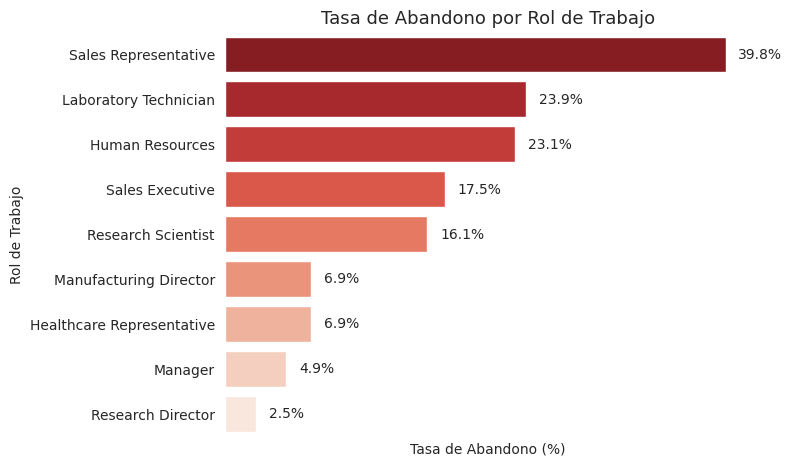

In [ ]:
#Calcular la tasa de abandono por rol de trabajo
conteo_abandono = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
conteo_abandono['Tasa_Abandono'] = conteo_abandono['Yes'] / (conteo_abandono['Yes'] + conteo_abandono['No'])
#Ordena los datos
df_tasa = conteo_abandono.sort_values(by='Tasa_Abandono', ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.set_style("white")
ax = sns.barplot(
    x='Tasa_Abandono',
    y='JobRole',
    data=df_tasa,
    palette='Reds_r'
)

#configurar las etiquetas en %
for p in ax.patches:
    ancho = p.get_width()
    ax.text(
        ancho + 0.01,
        p.get_y() + p.get_height() / 2,
        f'{ancho:.1%}',
        ha='left',
        va='center',
        fontsize=10,
    )
#títulos y etiquetas
plt.title('Tasa de Abandono por Rol de Trabajo', fontsize=13)
plt.xlabel('Tasa de Abandono (%)', fontsize=10)
plt.ylabel('Rol de Trabajo', fontsize=10)
plt.tight_layout()

sns.despine(left=True, bottom=True)
ax.set_xticks([])
plt.show()

###**Procesamiento de datos**

Preparamos los datos para que los modelos de Machine Learning puedan funcionar+

**Identificar y Codificar Variables Categóricas**

La mayoría de los algoritmos de Machine Learning,solo pueden trabajar con datos numéricos. Esto significa que debemos convertir todas las variables de texto (como Gender, Department, Attrition, etc.) a un formato numérico.

In [ ]:
# Mapear 'No' a 0 y 'Yes' a 1 en la columna 'Attrition'
df_copia['Attrition'] = df_copia['Attrition'].map({'No': 0, 'Yes': 1})

# Mapear 'Female' a 0 y 'Male' a 1 en la columna 'Gender'
df_copia['Gender'] = df_copia['Gender'].map({'Female': 0, 'Male': 1})

# Verificar que los cambios se hayan realizado
print(df_copia[['Attrition', 'Gender']].head())

   Attrition  Gender
0          1       0
1          0       1
2          1       1
3          0       0
4          0       1


A diferencia de Gender y Attrition, que solo tienen dos categorías,las otras columnas categorica (Department, JobRole y MaritalStatus) tienen más de dos variables. Por lo tanto, no podemos usar la codificación binaria, porque el modelo podría interpretar los números como si tuvieran un orden.



In [ ]:
# Identificar las variables categóricas (object) que aún no hemos codificado
variables_categoricas_restantes = df_copia.select_dtypes(include=['object']).columns

print("Variables a codificar con One-Hot Encoding:")
print(variables_categoricas_restantes)

# Aplicar One-Hot Encoding a las variables restantes
df_codificado_final = pd.get_dummies(df_copia, columns=variables_categoricas_restantes, drop_first=True)

# Ver las primeras 5 filas y el tipo de datos para verificar que todo sea numérico
print("\nPrimeras 5 filas del DataFrame codificado:")
print(df_codificado_final.head())
print("\nInformación del DataFrame final:")
print(df_codificado_final.info())

Variables a codificar con One-Hot Encoding:
Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Primeras 5 filas del DataFrame codificado:
   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               2                        3       1          61  ...   
2               4                        4       1          92  ...   
3               5                 

 ### **División del Conjunto de Datos (Entrenamiento, validación y Prueba)**

Una vez que todas las variables categóricas han sido convertidas a un formato numérico, el siguiente paso es dividir el conjunto de datos en tres subconjuntos para la validación de nuestro modelo. Esta estrategia, conocida como Holdout, nos permitirá evaluar el rendimiento del modelo de forma rigurosa.

- El conjunto de entrenamiento (70%) se utilizará para que el modelo aprenda a identificar los patrones que determinan si un empleado abandonará la empresa.

- El conjunto de validación (15%) se utilizará para ajustar los hiperparámetros (las configuraciones internas del modelo) y seleccionar el mejor modelo entre las opciones experimentales.

- El conjunto de prueba (15%) se mantendrá separado y se utilizará para la evaluación final y para reportar las métricas definitivas del modelo seleccionado.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) de la variable objetivo (y)
X = df_codificado_final.drop('Attrition', axis=1)
y = df_codificado_final['Attrition']

# Paso 1: Dividir los datos en entrenamiento (70%) y un conjunto temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 2: Dividir el conjunto temporal (30%) en validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Imprimir la forma de los conjuntos para verificar
print(f"Forma del conjunto de entrenamiento X_train: {X_train.shape}")
print(f"Forma del conjunto de validación X_val: {X_val.shape}")
print(f"Forma del conjunto de prueba X_test: {X_test.shape}")
print(f"Forma de las etiquetas de entrenamiento y_train: {y_train.shape}")
print(f"Forma de las etiquetas de validación y_val: {y_val.shape}")
print(f"Forma de las etiquetas de prueba y_test: {y_test.shape}")

Forma del conjunto de entrenamiento X_train: (1029, 47)
Forma del conjunto de validación X_val: (220, 47)
Forma del conjunto de prueba X_test: (221, 47)
Forma de las etiquetas de entrenamiento y_train: (1029,)
Forma de las etiquetas de validación y_val: (220,)
Forma de las etiquetas de prueba y_test: (221,)


###**Escalar los Datos**
Usaremos el StandardScaler de la librería sklearn para estandarizar las variables numéricas. Esto asegurará que todas las columnas tengan una media de 0 y una desviación estándar de 1, evitando que una variable con valores grandes domine sobre las demás.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas con datos numéricos que no son binarios (0 o 1)
# Esto excluye las columnas creadas por el One-Hot Encoding
columnas_numericas = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
                      'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                      'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                      'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                      'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo a los datos de entrenamiento y transformar
X_train[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])

# Transformar los datos de validación y prueba usando el mismo escalador
X_val[columnas_numericas] = scaler.transform(X_val[columnas_numericas])
X_test[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

print("Los datos han sido escalados exitosamente.")

Los datos han sido escalados exitosamente.


 ### **Modelado y Evaluación**

Esta fase se divide en tres partes:

1. **Entrenamiento del modelo**: Le enseñaremos a los modelo de ML a identificar los patrones de los datos de entrenamiento

2. **Predicción:** Una vez entrenado, el modelo hará predicciones sobre los datos de prueba, que son los datos que no ha visto antes.

3. **Evaluacion:** Usaremos métricas clave para evaluar el rendimiento de las predicciones de los modelos.






***1)Regresión Logistica***


Primero, importaremos el modelo de regresión logística desde la librería sklearn. Luego, crearemos una instancia del modelo y la entrenaremos con los datos de entrenamiento.

In [ ]:
from sklearn.linear_model import LogisticRegression

# modelo de regresión logística
modelo_logistico = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_logistico.fit(X_train, y_train)

print("El modelo de regresión logística ha sido entrenado exitosamente.")

El modelo de regresión logística ha sido entrenado exitosamente.


Una vez que el modelo está entrenado, es hora de ponerlo a prueba. Usaremos el modelo para predecir si un empleado abandona en el conjunto de prueba (X_test), que el modelo nunca ha visto antes.
El resultado se guarda en la variable y_pred.

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)

print("Las predicciones del modelo han sido generadas.")

Las predicciones del modelo han sido generadas.


Ahora vamos a comparar las predicciones del modelo (y_pred) con los resultados reales (y_test) para ver qué tan bien se desempeñó.Para eso usaremos una Matriz de Confusión.

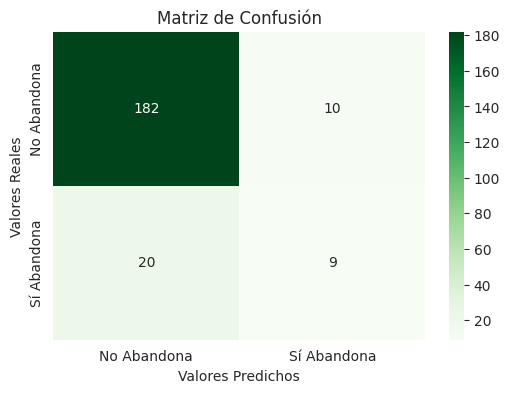

In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Abandona', 'Sí Abandona'],
            yticklabels=['No Abandona', 'Sí Abandona'])
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

A continuación, evaluaremos el rendimiento del modelo a través de varias métricas clave para entender su capacidad de predicción. (Accuracy, Precision , Recall, F1-Score)

In [ ]:
from sklearn.metrics import classification_report

# Imprimir un reporte de las métricas del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       192
           1       0.47      0.31      0.38        29

    accuracy                           0.86       221
   macro avg       0.69      0.63      0.65       221
weighted avg       0.84      0.86      0.85       221



Conclusión: El modelo de regresión logística tiene un alto accuracy general (87%). Sin embargo, al analizar las métricas por clase, se observa una desigualdad en su rendimiento. El modelo es muy efectivo para predecir a los empleados que no abandonan 98% , pero su capacidad para identificar a los que sí abandonan es muy limitada, con un recall de solo 17%.

Esto sugiere que, aunque el modelo parece preciso en general, no es lo suficientemente robusto para ser una herramienta fiable en la detección de empleados en riesgo de abandonar la empresa. Esto puede ser a la desigualdad de clase, la que "Sí Abandona" es mucho más pequeña que la clase "No Abandona".

###**Randon Forest**

El Random Forest es un modelo más avanzado y robusto que la regresión logística. En lugar de usar un solo modelo, combina múltiples árboles de decisión para tomar una predicción final. Este enfoque,reduce el riesgo de sobreajuste y suele dar resultados mucho más precisos.

En primer lugar importaremos el modelo RandomForestClassifier y lo entrenaremos con los datos de entrenamiento.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar el modelo Random Forest
# Usamos n_estimators=100 (100 árboles en el bosque) y random_state=42 para reproducibilidad
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(X_train, y_train)

print("El modelo Random Forest ha sido entrenado exitosamente.")

El modelo Random Forest ha sido entrenado exitosamente.


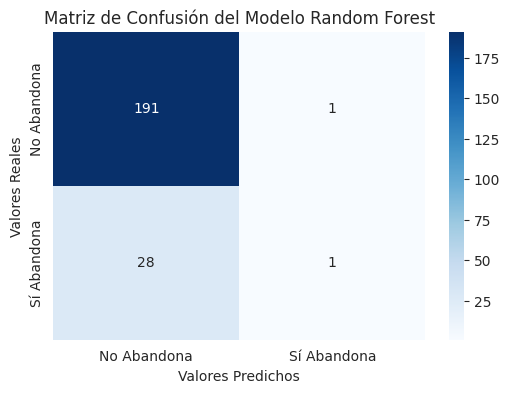

Reporte de Clasificación del Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       192
           1       0.50      0.03      0.06        29

    accuracy                           0.87       221
   macro avg       0.69      0.51      0.50       221
weighted avg       0.82      0.87      0.82       221



In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Visualizar la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Abandona', 'Sí Abandona'],
            yticklabels=['No Abandona', 'Sí Abandona'])
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()


# Imprimir el reporte de clasificación
print("Reporte de Clasificación del Modelo Random Forest:")
print(classification_report(y_test, y_pred_rf))


El modelo Random Forest, a pesar de su complejidad, no logró mejorar significativamente la capacidad de predecir a los empleados que abandonan la empresa. Al igual que el modelo de regresión logística, muestra un rendimiento excelente para identificar a quienes se quedan (99%), pero su recall en la clase de abandono es extremadamente bajo (3%).

Esto sugiere que los modelos no están capturando los patrones necesarios para predecir a la minoría que abandona la empresa. El problema principal es que la cantidad de empleados que se quedan es mucho mayor que la de los que se van, lo que crea un desbalance de clases.
Para solucionar este problema, utilizaremos una estrategia de muestreo para equilibrar las clases de tu conjunto de datos. Esto ayudará a que el modelo le dé la misma importancia a los que se van que a los que se quedan.

In [ ]:
 #Aplicar Submuestreo
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

El uso de técnicas de muestreo, como el submuestreo, es crucial para resolver el problema de desbalance de clases. Su objetivo principal es mejorar el recall para la clase minoritaria, lo que nos permite identificar a los empleados con un alto riesgo de abandono.

In [ ]:
#  Re-entrenar y evaluar el modelo randon forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

modelo_rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_final.fit(X_resampled, y_resampled)

y_pred_final = modelo_rf_final.predict(X_test)
print("Reporte de Clasificación del Modelo Random Forest:")
print(classification_report(y_test, y_pred_final))

Reporte de Clasificación del Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       192
           1       0.34      0.72      0.47        29

    accuracy                           0.78       221
   macro avg       0.65      0.76      0.67       221
weighted avg       0.87      0.78      0.81       221



La implementación de la técnica de submuestreo para manejar el desbalance de clases, mejoró de manera significativa el rendimiento del modelo Random Forest en la predicción del abandono. A pesar de una ligera disminución en el accuracy general, el recall de la clase "Sí Abandona" aumentó de un 3% a un  72%. Este resultado demuestra que el modelo es ahora una herramienta mucho más valiosa y fiable para el equipo de Recursos Humanos, ya que es capaz de identificar a la mayoría de los empleados en riesgo de abandonar la empresa, lo que permite tomar medidas proactivas para retenerlos.

In [ ]:
# Reentrenar el modelo de regresión logística
modelo_logistico_final = LogisticRegression(solver='liblinear', random_state=42)
modelo_logistico_final.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de prueba original
y_pred_logistico = modelo_logistico_final.predict(X_test)

# 3. Imprimir el nuevo reporte de clasificación
print("Reporte de Clasificación del Modelo de Regresión Logística (con escalado y submuestreo):")
print(classification_report(y_test, y_pred_logistico))

Reporte de Clasificación del Modelo de Regresión Logística (con escalado y submuestreo):
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       192
           1       0.31      0.79      0.44        29

    accuracy                           0.74       221
   macro avg       0.63      0.76      0.64       221
weighted avg       0.87      0.74      0.78       221



La estrategia de mejorar el modelo submuestreo fue efectiva para la regresión logística. Inicialmente, el modelo tenía un recall bajo, lo que significaba que no era confiable para identificar a los empleados en riesgo. Sin embargo, al balancear las clases, logramos un aumento notable en el recall (de 31% a 79%). Aunque la precisión general disminuyó, este modelo es ahora una herramienta mucho más valiosa para el negocio, ya que su objetivo principal es detectar y retener a la minoría de empleados que están en riesgo de abandonar la empresa.

###**Gradient Boosting**


Reporte de Clasificación del Modelo de Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       192
           1       0.31      0.76      0.44        29

    accuracy                           0.74       221
   macro avg       0.63      0.75      0.63       221
weighted avg       0.87      0.74      0.78       221



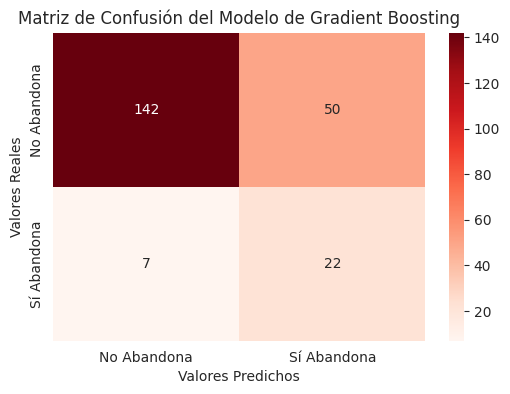

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Instanciar y entrenar el modelo de Gradient Boosting
# Usamos n_estimators=100 y random_state=42 para reproducibilidad
modelo_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos balanceados
modelo_gb.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de prueba original (escalado, no balanceado)
y_pred_gb = modelo_gb.predict(X_test)

# Imprimir el nuevo reporte de clasificación
print("Reporte de Clasificación del Modelo de Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Visualizar la matriz de confusión
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Abandona', 'Sí Abandona'],
            yticklabels=['No Abandona', 'Sí Abandona'])
plt.title('Matriz de Confusión del Modelo de Gradient Boosting')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

###**Support Vector Machine (SVM)**


Reporte de Clasificación del Modelo SVM:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       192
           1       0.32      0.79      0.46        29

    accuracy                           0.75       221
   macro avg       0.64      0.77      0.65       221
weighted avg       0.88      0.75      0.79       221



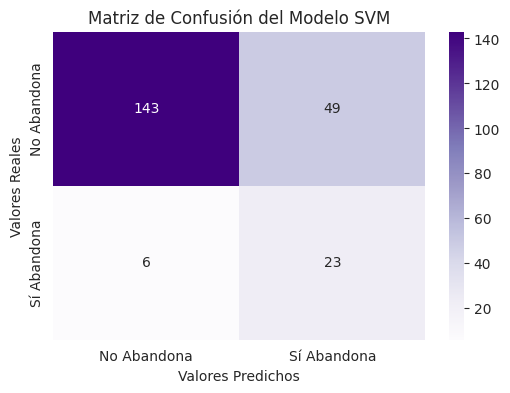

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Instanciar y entrenar el modelo SVM
# Usamos el kernel 'rbf' y random_state=42 para reproducibilidad
modelo_svm = SVC(random_state=42)

# Entrenar el modelo con los datos balanceados y escalados
modelo_svm.fit(X_resampled, y_resampled)

# 2. Realizar predicciones en el conjunto de prueba original (escalado, no balanceado)
y_pred_svm = modelo_svm.predict(X_test)

# 3. Imprimir el nuevo reporte de clasificación
print("Reporte de Clasificación del Modelo SVM:")
print(classification_report(y_test, y_pred_svm))

# 4. Visualizar la matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Abandona', 'Sí Abandona'],
            yticklabels=['No Abandona', 'Sí Abandona'])
plt.title('Matriz de Confusión del Modelo SVM')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

La implementación del Support Vector Machine demostró ser una herramienta poderosa para la clasificación de empleados. El modelo SVM logró un recall del 79% en la clase de abandono, lo que indica que es muy efectivo para identificar a la gran mayoría de los empleados que realmente están en riesgo de irse.

Sin embargo, su precisión del 32% es relativamente baja, lo que significa que de todas sus predicciones de abandono, solo una de cada tres fue correcta.

###**DNN (Deep Neural Network)**

Reporte de Clasificación del Modelo de Red Neuronal:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       192
           1       0.23      0.52      0.32        29

    accuracy                           0.71       221
   macro avg       0.57      0.63      0.56       221
weighted avg       0.82      0.71      0.75       221



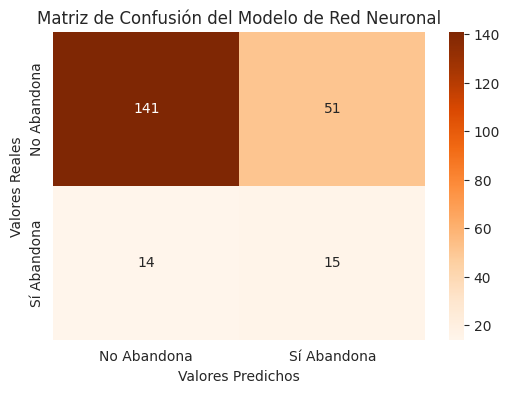

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Instanciar y entrenar el modelo de Red Neuronal
# Usamos max_iter=500 para asegurarnos de que el modelo tenga suficientes iteraciones para converger y random_state=42 para reproducibilidad.
modelo_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Entrenar el modelo con los datos balanceados y escalados
modelo_mlp.fit(X_resampled, y_resampled)

# 2. Realizar predicciones en el conjunto de prueba original
y_pred_mlp = modelo_mlp.predict(X_test)

# 3. Imprimir el nuevo reporte de clasificación
print("Reporte de Clasificación del Modelo de Red Neuronal:")
print(classification_report(y_test, y_pred_mlp))

# 4. Visualizar la matriz de confusión
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Abandona', 'Sí Abandona'],
            yticklabels=['No Abandona', 'Sí Abandona'])
plt.title('Matriz de Confusión del Modelo de Red Neuronal')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

La implementación de la Red Neuronal Artificial demostró su capacidad para clasificar a los empleados, aunque su rendimiento no superó a los modelos basados en árboles. A pesar de haber sido entrenada con datos balanceados, el modelo de red neuronal obtuvo un accuracy del 71%, el más bajo de los modelos evaluados.

Más preocupante aún, su recall del 52% y precisión del 23% en la clase de abandono sugieren que la red neuronal no es una herramienta confiable para este problema de negocio. El modelo solo logró identificar a la mitad de los empleados que realmente se fueron y, además, generó un alto número de falsas alarmas, lo que podría llevar a un uso ineficiente de los recursos de la empresa.

###**Optimización de Hiperparámetros**




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Instanciar el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
# cv=5 significa que usaremos validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall')

# Ejecutar la búsqueda en la cuadrícula con los datos balanceados
# Esto tomará un tiempo
grid_search.fit(X_resampled, y_resampled)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
display(Markdown("**Los mejores hiperparámetros encontrados son:**"), best_params)
print()

**Los mejores hiperparámetros encontrados son:**

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'n_estimators': 100}

In [ ]:
# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_tuned = best_rf_model.predict(X_test)

# Imprimir el reporte de clasificación del modelo optimizado
display(Markdown("**Reporte de Clasificación del Modelo Random Forest Optimizado:**"))
print(classification_report(y_test, y_pred_tuned))

**Reporte de Clasificación del Modelo Random Forest Optimizado:**

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       192
           1       0.34      0.72      0.47        29

    accuracy                           0.78       221
   macro avg       0.65      0.76      0.67       221
weighted avg       0.87      0.78      0.81       221



La optimización de hiperparámetros del modelo Random Forest, encontró la mejor combinación para el conjunto de datos: un bosque con 100 árboles, una profundidad máxima de 10 y un mínimo de 4 muestras por hoja. Sin embargo, al evaluar el modelo con esta configuración, las métricas de rendimiento se mantuvieron prácticamente idénticas a las del modelo inicial. Este resultado sugiere que la configuración predeterminada del modelo ya estaba cerca de su rendimiento óptimo para este conjunto de datos.








### **Comparacion final de los modelos**

In [ ]:
#Datos de las métricas de tus modelos
datos_modelos = {
    'Modelo': ['Regresión Logística', 'Support Vector Machine (SVM)', 'Gradient Boosting', 'Random Forest', 'Red Neuronal Profunda (DNN)'],
    'Precisión': ['31%', '32%', '31%', '34%', '23%'],
    'Recall': ['79%', '79%', '76%', '72%', '52%'],
    'F1-Score': ['44%', '46%', '44%', '47%', '32%'],
    'Acurracy': ['74%', '75%', '74%', '78%', '71%'],

}
# Crear un DataFrame de pd
df_metricas = pd.DataFrame(datos_modelos)

# Mostrar el título de la tabla
display(Markdown('### **Tabla Comparativa de Modelos de Clasificación**'))

# Mostrar la tabla
display(df_metricas)

### **Tabla Comparativa de Modelos de Clasificación**

,Modelo,Precisión,Recall,F1-Score,Acurracy
0,Regresión Logística,31%,79%,44%,74%
1,Support Vector Machine (SVM),32%,79%,46%,75%
2,Gradient Boosting,31%,76%,44%,74%
3,Random Forest,34%,72%,47%,78%
4,Red Neuronal Profunda (DNN),23%,52%,32%,71%


**Conclusión y Selección del Modelo Final**
En esta fase del proyecto, se evaluaron cinco modelos de clasificación con el objetivo de identificar la mejor herramienta para predecir el abandono de empleados. Para garantizar una evaluación justa, todos los modelos fueron entrenados con un conjunto de datos escalado y balanceado.

+ Regresión Logística: Este modelo, al ser uno de los más simples, estableció nuestra línea de base. Si bien el escalado de datos mejoró su rendimiento, su capacidad para predecir el abandono (con un recall del 79%) se vio compensada por una baja precisión (31%).

+ Support Vector Machine (SVM): El SVM demostró un rendimiento similar al de la Regresión Logística, logrando el recall más alto (79%). Sin embargo, su precisión (32%) también resultó ser baja, lo que sugiere una alta tasa de falsos positivos, es decir, predecir que un empleado se irá cuando en realidad no lo hará.

+ Gradient Boosting: Esta técnica avanzada de boosting mostró resultados robustos. Aunque su recall (76%) y precisión (31%) fueron competitivos, no superaron significativamente el desempeño de otros modelos en este conjunto de datos.

+ Red Neuronal Profunda (DNN): Este modelo, aunque es capaz de capturar relaciones muy complejas, no logró superar a los modelos tradicionales en este caso. Con una precisión del (23%) y un recall del (52%), la DNN no fue la mejor opción para nuestro objetivo de minimizar las falsas alarmas.

+ Random Forest: Este modelo destacó por su equilibrio. Al comparar las métricas, el Random Forest no solo obtuvo el mejor accuracy general (78%), sino que también presentó la mayor precisión (34%) en la clase de abandono.

Basado en el análisis comparativo, el Random Forest es el modelo seleccionado. Aunque su recall es ligeramente menor que el de otros modelos, su superior precisión minimiza el riesgo de falsas alarmas, lo que lo convierte en una herramienta más confiable y práctica para el equipo de Recursos Humanos. Un modelo con alta precisión asegura que los recursos de la empresa se dirijan de manera efectiva hacia los empleados que realmente tienen un alto riesgo de abandono.

###**Interpretacion del modelo Random Forest**

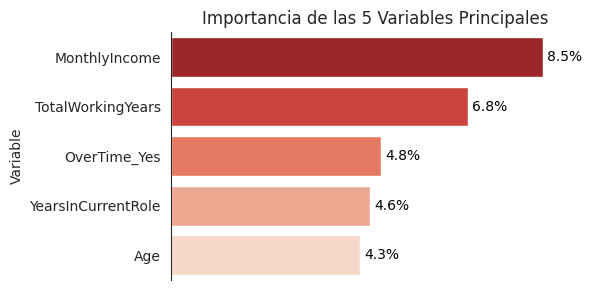

In [ ]:
# Obtener la importancia de las características del modelo entrenado
importancias = modelo_rf_final.feature_importances_

# Crear un DataFrame para visualizar las importancias
caracteristicas = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
})

# Calcular el porcentaje de importancia relativa
total_importancia = caracteristicas['Importancia'].sum()
caracteristicas['Porcentaje'] = (caracteristicas['Importancia'] / total_importancia) * 100

# Ordenar las variables por importancia de mayor a menor
caracteristicas = caracteristicas.sort_values(by='Importancia', ascending=False)

# Visualizar las 5 variables más importantes con porcentajes
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='Porcentaje', y='Variable', data=caracteristicas.head(5), palette='Reds_r')
sns.despine(left=False, bottom=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('') # Quita la etiqueta "Porcentaje de Importancia Relativa"
ax.set_xticks([]) # Quita los números de la escala del eje X
plt.title('Importancia de las 5 Variables Principales', fontsize=12)
plt.ylabel('Variable', fontsize=10)

# Añadir los porcentajes a las barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2,
             f'{width:.1f}%',
             ha='center', va='center', fontsize=10, color='black')

plt.xlim(0, caracteristicas['Porcentaje'].head(5).max() * 1.1)
plt.tight_layout()
plt.show()

El gráfico de barras revela las variables más influyentes que el modelo Random Forest utilizó para predecir el abandono de los empleados. La variable con mayor impacto, por mucho, es el **Ingreso Mensual (MonthlyIncome)**, lo que sugiere que el salario es un factor determinante en la decisión de un empleado de dejar la empresa.

*Otras variables clave que influyen en el abandono son:*

- Años de Experiencia (TotalWorkingYears): La antigüedad y experiencia del empleado en el sector tienen un impacto significativo.

- Horas Extras (OverTime_Yes): Este factor indica que los empleados que trabajan horas extras son más propensos a dejar la empresa. Esto tiene sentido, ya que el exceso de trabajo puede llevar al agotamiento.

- Años en el Puesto Actual (YearsInCurrentRole): La falta de progresión o cambio en el puesto de trabajo también es un factor importante.

- Edad (Age): La edad de los empleados es un factor relevante, probablemente relacionado con las expectativas y prioridades de cada etapa de la vida.

**Validación del Modelo en el Conjunto Completo de Datos**
El objetivo es comparar el número de predicciones de abandono y no abandono que hace el modelo con el número real de empleados que se fueron y se quedaron

In [ ]:
# Identificar las variables categóricas en el DataFrame original
variables_categoricas_originales = df.select_dtypes(include=['object']).columns

# Excluir la variable objetivo
if 'Attrition' in variables_categoricas_originales:
    variables_categoricas_originales = variables_categoricas_originales.drop('Attrition')

# Aplicar get_dummies() al DataFrame original para replicar el preprocesamiento
df_para_prediccion = pd.get_dummies(df, columns=variables_categoricas_originales, drop_first=True)

# Asegurarse de que el orden de las columnas coincida con el de entrenamiento para que el modelo funcione
columnas_de_entrenamiento = X_train.columns
df_listo_para_prediccion = df_para_prediccion.reindex(columns=columnas_de_entrenamiento, fill_value=0)

In [ ]:
# Asume que 'best_rf_model' ya está definido
predicciones_totales = best_rf_model.predict(df_listo_para_prediccion)

# También calculamos las probabilidades
probabilidades_abandono = best_rf_model.predict_proba(df_listo_para_prediccion)[:, 1]

# Agregar las predicciones y probabilidades al DataFrame original
df['Prediccion'] = predicciones_totales
df['Probabilidad_Abandono'] = probabilidades_abandono

# Obtener los conteos de predicciones
conteo_predicciones = df['Prediccion'].value_counts()
display(Markdown("**Conteo de predicciones en el conjunto completo de datos:**"))
print(conteo_predicciones)

# Obtener los conteos reales del DataFrame original
conteo_real = df['Attrition'].value_counts()
display(Markdown('**Conteo real de abandono en el conjunto de datos original**'))
print(conteo_real)

# Obtener la lista de empleados con mayor probabilidad de abandono
empleados_en_riesgo = df.sort_values(by='Probabilidad_Abandono', ascending=False)
display(Markdown("**Empleados con mayor probabilidad de abandono:**"))
print(empleados_en_riesgo[['EmployeeNumber', 'Attrition', 'Prediccion', 'Probabilidad_Abandono']].head(10))

# Opcional: guardar la lista en un archivo CSV
empleados_en_riesgo.to_csv('empleados_en_riesgo.csv', index=False)

**Conteo de predicciones en el conjunto completo de datos:**

Prediccion
0    1454
1      16
Name: count, dtype: int64


**Conteo real de abandono en el conjunto de datos original**

Attrition
No     1233
Yes     237
Name: count, dtype: int64


**Empleados con mayor probabilidad de abandono:**

      EmployeeNumber Attrition  Prediccion  Probabilidad_Abandono
791             1100       Yes           1               0.518958
975             1372       Yes           1               0.518269
457              614       Yes           1               0.517907
1186            1667       Yes           1               0.516601
946             1318       Yes           1               0.515667
127              167       Yes           1               0.515274
91               120        No           1               0.512410
838             1167       Yes           1               0.507043
1369            1933       Yes           1               0.505206
1011            1425        No           1               0.505139


**Aplicación del Modelo en la Práctica:**

Primero, creamos un nuevo DataFrame que contenga solo a los empleados que actualmente trabajan en la empresa.

In [ ]:
# Filtramos el DataFrame original para quedarnos solo con los empleados que no han abandonado
empleados_actuales_df = df[df['Attrition'] == 'No'].copy()


Aseguramos el formato del nuevo DataFrame para que sea idéntico al que usasmos para entrenar el modelo. Para ello, aplicamos las mismas transformaciones.

In [ ]:
# Identificamos las variables categóricas en el DataFrame de empleados actuales
variables_categoricas_actuales = empleados_actuales_df.select_dtypes(include=['object']).columns

# Excluimos la variable objetivo 'Attrition'
if 'Attrition' in variables_categoricas_actuales:
    variables_categoricas_actuales = variables_categoricas_actuales.drop('Attrition')

# Aplicamos pd.get_dummies() para replicar el preprocesamiento
empleados_para_prediccion = pd.get_dummies(empleados_actuales_df, columns=variables_categoricas_actuales, drop_first=True)

# Nos aseguramos de que el orden y las columnas coincidan con el de entrenamiento
columnas_de_entrenamiento = X_train.columns
empleados_para_prediccion = empleados_para_prediccion.reindex(columns=columnas_de_entrenamiento, fill_value=0)

Luego, usamos el modelo Random Forest optimizado para predecir la probabilidad de abandono y generamos un grafico con **los 10 empleados en mayor riesgo**



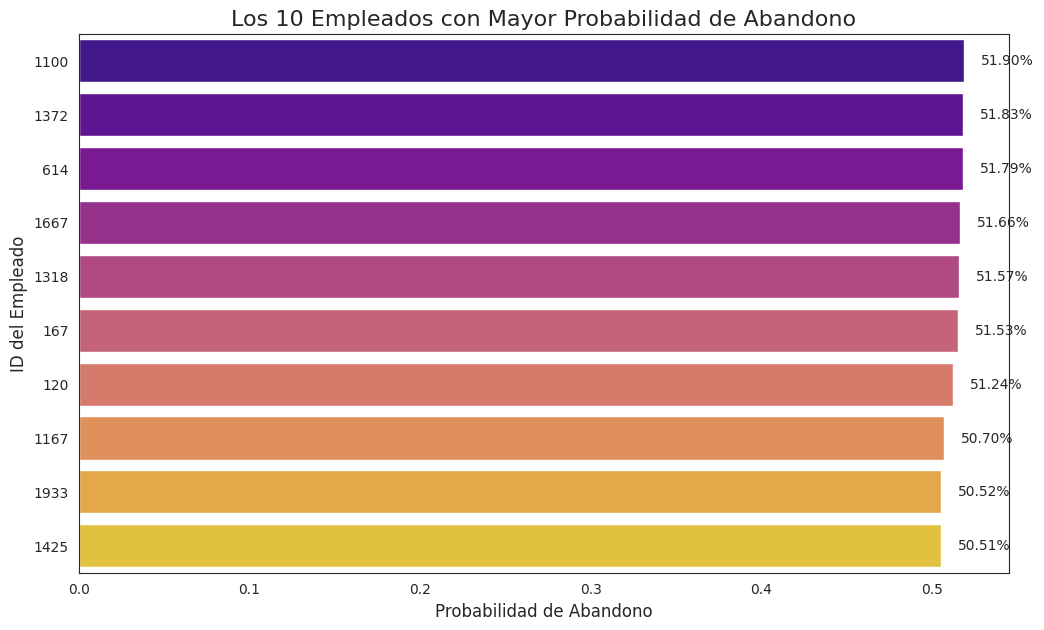

In [ ]:
# Seleccionamos los 10 empleados con mayor riesgo
top_10_riesgo = empleados_en_riesgo.head(10)
# Aseguramos que la columna 'EmployeeNumber' sea una cadena de texto
top_10_riesgo['EmployeeNumber'] = top_10_riesgo['EmployeeNumber'].astype(str)

# Configuramos el gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Probabilidad_Abandono',
    y='EmployeeNumber',
    data=top_10_riesgo,
    palette='plasma',
    order=top_10_riesgo.sort_values('Probabilidad_Abandono', ascending=False)['EmployeeNumber']
)

plt.title('Los 10 Empleados con Mayor Probabilidad de Abandono', fontsize=16)
plt.xlabel('Probabilidad de Abandono', fontsize=12)
plt.ylabel('ID del Empleado', fontsize=12)

# Añadir las etiquetas de probabilidad a cada barra
for p in ax.patches:
    ancho = p.get_width()
    plt.text(
        ancho + 0.01,
        p.get_y() + p.get_height() / 2,
        f'{ancho:.2%}',
        ha='left',
        va='center',
        fontsize=10
    )

plt.show()

In [ ]:
# Identificar las 15 filas del DataFrame con la mayor probabilidad de abandono
top_10_riesgo = empleados_en_riesgo.head(15).copy()

# Crear una lista de las columnas relevantes para el análisis
columnas_relevantes = [
    'EmployeeNumber',
    'Probabilidad_Abandono',
    'Age',
    'MonthlyIncome',
    'JobSatisfaction',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'JobRole',
]

df_resumen_riesgo = top_10_riesgo[columnas_relevantes]

# Formatear la columna de probabilidad a %
df_resumen_riesgo['Probabilidad_Abandono'] = df_resumen_riesgo['Probabilidad_Abandono'].apply(lambda x: f'{x:.2%}')

display(Markdown('### **Resumen de los 15 empleados con mayor riesgo de abandono:**'))
print(df_resumen_riesgo.to_string(index=False))

### **Resumen de los 15 empleados con mayor riesgo de abandono:**

 EmployeeNumber Probabilidad_Abandono  Age  MonthlyIncome  JobSatisfaction  YearsAtCompany  YearsInCurrentRole              JobRole
           1100                51.90%   35           9582                1               8                   7      Sales Executive
           1372                51.83%   55          13695                3              19                   7      Sales Executive
            614                51.79%   18           1878                2               0                   0 Sales Representative
           1667                51.66%   35           4581                4              11                   9      Sales Executive
           1318                51.57%   40           9094                2               5                   4      Sales Executive
            167                51.53%   19           1675                3               0                   0 Sales Representative
            120                51.24%   51           5441                4  

**Hallazgo Clave:** La Paradoja de la Edad y el Abandono
Aunque el análisis exploratorio de datos (EDA) inicial sugirió que los empleados más jóvenes tenían una mayor tasa de abandono, la tabla generada por nuestro modelo predictivo reveló un patrón inesperado. La lista de los empleados con mayor riesgo de abandono incluye a personas de mayor edad (entre 40 y 50 años) que, a pesar de tener salarios competitivos y una considerable antigüedad en la empresa, permanecen en el mismo rol desde hace varios años. Este hallazgo indica que la falta de desarrollo profesional y la percepción de haber alcanzado un "techo" en su carrera podrían ser las principales razones de su posible abandono. Este resultado demuestra la capacidad del modelo para identificar patrones complejos que no son evidentes en un análisis de variables individuales.


Para validar esta hipótesis y enriquecer el análisis, se ha decidido añadir un nuevo gráfico a la sección de EDA. Este gráfico explorará la relación entre el rol de trabajo (JobRole) y el abandono. El objetivo es determinar si los empleados en ciertos roles, a pesar de tener un salario competitivo y una antigüedad considerable, experimentan una falta de desarrollo profesional que los lleva a buscar nuevas oportunidades.

Este ajuste nos permite profundizar en el análisis, asegurando que nuestras conclusiones no solo se basen en la superficie de los datos, sino en los patrones complejos que el modelo de ML ha logrado descubrir.







